<h1 align='center'> 영상처리 프로그래밍 실습 8</h1>

<h6 align='right'> 2022. 5. 10. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 5월 16일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 지난 주 문제 1. 

예제 2의 프로그램을 다음과 같이 변경하라.

- 이동 평균 필터링을 가우시안 필터링으로 변경하라.
- 가우시안 커널의 표준편차인 sigmaX와 sigmaY를 개별적으로 조정할 수 있는 trackBar interface를 2 개 제공한다. 단, 표준 편차의 최댓값은 10.0이 되도록 한다.


In [2]:
def Gaussian_filtering(file_name):
    def onGaussianFiltering(val):
        nonlocal img2, ksize, sigmaX, sigmaY
        ksize = val // 2 * 2 + 1
        img_filtered = cv2.GaussianBlur(img, (ksize, ksize), sigmaX=sigmaX, sigmaY=sigmaY)
        img2 = np.hstack((img, img_filtered))
        cv2.imshow(winName, img2)
            
    def onSigmaX(val):
        nonlocal sigmaX, sigmaY
        sigmaX = val / sigma_scale_factor
        v = ksize
        onGaussianFiltering(v)

    def onSigmaY(val):
        nonlocal sigmaX, sigmaY
        sigmaY = val / sigma_scale_factor
        v = ksize
        onGaussianFiltering(v)

    
    from os.path import exists
    ksize = 3
    sigmaX = 0.1
    sigmaY = 0.1
    sigma_scale_factor = 10
    if exists(file_name):
        img = cv2.imread(file_name)
    else:
        print(f"Image file '{file_name}' does not exist.")
        return
    img2 = np.hstack((img, img))

    winName = "Gaussian Filtering"
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
    cv2.imshow(winName, img2)

    cv2.createTrackbar('kernel size', winName, 1, 51, onGaussianFiltering)
    cv2.createTrackbar('sigma_x', winName, int(sigmaX*sigma_scale_factor), 101, onSigmaX)
    cv2.createTrackbar('sigma_y', winName, int(sigmaY*sigma_scale_factor), 101, onSigmaY)
    cv2.setTrackbarMin('kernel size', winName, 1)
    cv2.setTrackbarMin('sigma_x', winName, 1)
    cv2.setTrackbarMin('sigma_y', winName, 1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
Gaussian_filtering('grass.jpg')

## 예제 1.

다음 프로그램을 실행하라.


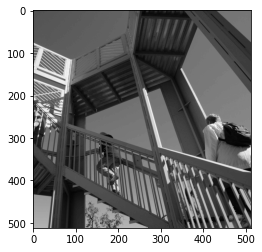

In [2]:
from scipy import misc
ascent = misc.ascent()
plt.imshow(ascent, cmap='gray')
plt.show()

In [3]:
ascent.dtype, ascent.min(), ascent.max()

(dtype('int64'), 0, 255)

In [4]:
img = ascent.astype(np.uint8)

### 예제 2. 
예제 1의 영상에 아래 두 커널을 적용해서 gradient의 크기를 구하고, 
cv2.imshow 함수를 이용해서 원 영상과 gradient 크기 영상을 나란히 표시하라.

In [5]:
k_diff_x = np.array([[0, 0, 0], 
                [0, -1, 0], 
                [0, 1, 0]])
k_diff_y = np.array([[0, 0, 0], 
                [0, -1, 1], 
                [0, 0, 0]])

In [6]:
def filtering():
    k_diff_x = np.array([[0, 0, 0], 
                [0, -1, 0], 
                [0, 1, 0]])
    k_diff_y = np.array([[0, 0, 0], 
                [0, -1, 1], 
                [0, 0, 0]])
    Gx_img = cv2.filter2D(img, cv2.CV_32F, k_diff_x)
    Gy_img = cv2.filter2D(img, cv2.CV_32F, k_diff_y)
    G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
    return G_img

img_filterd = filtering()
img2 = np.hstack((img, img_filterd))
winName = 'Magnitude of Gradient'
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 예제 3. 
예제 1의 영상에 두 개의 대각 방향의 Roberts 두 커널을 적용한 후에 에지의 크기를 구하고, 
cv2.imshow 함수를 이용해서 원 영상과 에지의 크기 영상을 나란히 표시하라.

In [12]:
def filtering():
    roberts_1 = np.array([[-1, 0, 0], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    roberts_2 = np.array([[0, 0, -1], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    Gx_img = cv2.filter2D(img, cv2.CV_32F, roberts_1)
    Gy_img = cv2.filter2D(img, cv2.CV_32F, roberts_2)
    G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
    return G_img

img_filterd = filtering()
img2 = np.hstack((img, img_filterd))
winName = 'Magnitude of Gradient'
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 예제 4. 
예제 2와 예제 3의 프로그램을 하나로 통합하여 edge_detection(img) 함수로 만들려고 한다.
단, trackBar interface를 이용해서 수평/수직 방향의 에지의 크기를 선택한다.
- 0: 원 영상 - 원 영상
- 1: 원 영상 - 수평/수직 방향의 에지 크기
- 2: 원 영상 - 대각 방향의  에지 크기


In [7]:
def edge_detection(img):
    def onFiltering(val):
        nonlocal img2
        if val == 0:
            img2 = np.hstack((img, img))
        elif val == 1:
            Gx_img = cv2.filter2D(img, cv2.CV_32F, k_diff_x)
            Gy_img = cv2.filter2D(img, cv2.CV_32F, k_diff_y)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        elif val == 2:
            Gx_img = cv2.filter2D(img, cv2.CV_32F, roberts_1)
            Gy_img = cv2.filter2D(img, cv2.CV_32F, roberts_2)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        cv2.imshow(winName, img2)

    k_diff_x = np.array([[0, 0, 0], 
                         [0, -1, 0], 
                         [0, 1, 0]])
    k_diff_y = np.array([[0, 0, 0], 
                         [0, -1, 1], 
                         [0, 0, 0]])
    roberts_1 = np.array([[-1, 0, 0], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    roberts_2 = np.array([[0, 0, -1], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    


    img2 = np.hstack((img, img))
    winName = 'Edge Detection'
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
    cv2.createTrackbar('direction', winName, 0, 2, onFiltering)

    cv2.imshow(winName, img2)
    cv2.waitKey()
    cv2.destroyAllWindows()


In [8]:
edge_detection(img)

### 예제 5. 
예제 4의 프로그램에 다음 기능을 추가하라.
- 0: 원 영상 - 원 영상
- 1: 원 영상 - 수평/수직 방향의 에지 크기
- 2: 원 영상 - 대각 방향의  에지 크기
- 3: 원 영상 - Prewitt 커널 에지 크기
- 4: 원 영상 - 4 방향 라플라시안 결과의 절대값
- 5: 원 영상 - 8 방향 라플라시안 결과의 절대값


In [9]:
from os.path import exists
def edge_detection(img):
    def onFiltering(val):
        nonlocal img2
        if val == 0:
            img2 = np.hstack((img, img))
        elif val == 1:
            Gx_img = cv2.filter2D(img, cv2.CV_32F, k_diff_x)
            Gy_img = cv2.filter2D(img, cv2.CV_32F, k_diff_y)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        elif val == 2:
            Gx_img = cv2.filter2D(img, cv2.CV_32F, roberts_1)
            Gy_img = cv2.filter2D(img, cv2.CV_32F, roberts_2)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        elif val == 3:
            Gx_img = cv2.filter2D(img, cv2.CV_32F, prewitt_x)
            Gy_img = cv2.filter2D(img, cv2.CV_32F, prewitt_y)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        elif val == 4:
            G_img = cv2.filter2D(img, cv2.CV_32F, laplacian_4)
            G_img = np.abs(G_img).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        elif val == 5:
            G_img = cv2.filter2D(img, cv2.CV_32F, laplacian_8)
            G_img = np.abs(G_img).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img, G_img))
        
        cv2.imshow(winName, img2)

    k_diff_x = np.array([[0, 0, 0], 
                         [0, -1, 0], 
                         [0, 1, 0]])
    k_diff_y = np.array([[0, 0, 0], 
                         [0, -1, 1], 
                         [0, 0, 0]])
    roberts_1 = np.array([[-1, 0, 0], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    roberts_2 = np.array([[0, 0, -1], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    laplacian_4 = np.array([[0, -1, 0], 
                            [-1, 4, -1], 
                            [0, -1, 0]])
    laplacian_8 = np.array([[-1, -1, -1], 
                            [-1,  8, -1], 
                            [-1, -1, -1]])
    prewitt_x = np.array([[-1, 0, 1], 
                          [-1, 0, 1], 
                          [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], 
                          [0, 0, 0], 
                          [1, 1, 1]])


    img2 = np.hstack((img, img))
    winName = 'Edge Detection'
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
    cv2.createTrackbar('direction', winName, 0, 5, onFiltering)

    cv2.imshow(winName, img2)
    cv2.waitKey()
    cv2.destroyAllWindows()

    


In [12]:
edge_detection(img)

### 예제 6. 
예제 5의 프로그램을 원 영상에 가우시안 잡음을 추가한 후에 에지를 검출하는 프로그램으로 수정하라.

단, 왼쪽에는 가우시안 잡음이 포함된 영상을 표시하고, 오른쪽에는 예제 5에서 구한 에지 영상을 표시한다. 
또한, trackBar 인터페이스를 추가해서 가우시안 잡음의 분산을 조정할 수 있어야 한다.


In [13]:
from os.path import exists
def edge_detection(img):
    def onFiltering(val):
        nonlocal img2, kernel_type
        kernel_type = val
        if val == 0:
            img2 = np.hstack((img_n, img_n))
        elif val == 1:
            Gx_img = cv2.filter2D(img_n, cv2.CV_32F, k_diff_x)
            Gy_img = cv2.filter2D(img_n, cv2.CV_32F, k_diff_y)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img_n, G_img))
        elif val == 2:
            Gx_img = cv2.filter2D(img_n, cv2.CV_32F, roberts_1)
            Gy_img = cv2.filter2D(img_n, cv2.CV_32F, roberts_2)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img_n, G_img))
        elif val == 3:
            Gx_img = cv2.filter2D(img_n, cv2.CV_32F, prewitt_x)
            Gy_img = cv2.filter2D(img_n, cv2.CV_32F, prewitt_y)
            G_img = np.sqrt(Gx_img**2 + Gy_img**2).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img_n, G_img))
        elif val == 4:
            G_img = cv2.filter2D(img_n, cv2.CV_32F, laplacian_4)
            G_img = np.abs(G_img).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img_n, G_img))
        elif val == 5:
            G_img = cv2.filter2D(img_n, cv2.CV_32F, laplacian_8)
            G_img = np.abs(G_img).round().clip(0,255).astype(np.uint8)
            img2 = np.hstack((img_n, G_img))
        
        cv2.imshow(winName, img2)

    k_diff_x = np.array([[0, 0, 0], 
                         [0, -1, 0], 
                         [0, 1, 0]])
    k_diff_y = np.array([[0, 0, 0], 
                         [0, -1, 1], 
                         [0, 0, 0]])
    roberts_1 = np.array([[-1, 0, 0], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    roberts_2 = np.array([[0, 0, -1], 
                          [0, 1, 0], 
                          [0, 0, 0]])
    laplacian_4 = np.array([[0, -1, 0], 
                            [-1, 4, -1], 
                            [0, -1, 0]])
    laplacian_8 = np.array([[-1, -1, -1], 
                            [-1,  8, -1], 
                            [-1, -1, -1]])
    prewitt_x = np.array([[-1, 0, 1], 
                          [-1, 0, 1], 
                          [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], 
                          [0, 0, 0], 
                          [1, 1, 1]])

    def onGaussinNoise(val):
        # 잡음이 들어간 영상 생성
        nonlocal img_n
        noise = np.random.normal(0, val/100, img.shape)
        img_f = img/255 + noise
        img_n = (255*img_f).round().clip(0,255).astype(np.uint8)
        onFiltering(kernel_type)
    
    img_n = img.copy()
    img2 = np.hstack((img_n, img_n))
    kernel_type  = 0
    winName = 'Edge Detection'
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
    cv2.createTrackbar('direction', winName, 0, 5, onFiltering)
    cv2.createTrackbar('std of GN', winName, 0, 10, onGaussinNoise)

    cv2.imshow(winName, img2)
    cv2.waitKey()
    cv2.destroyAllWindows()

    


In [14]:
edge_detection(img)

### 예제 7. Canny Edge detection

다음 도움말과 프로그램을 통해서 cv2.Canny() 함수의 사용법을 익혀보자.

In [15]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

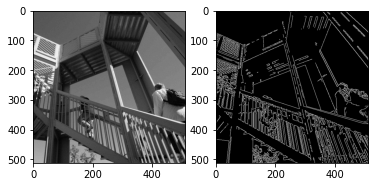

In [16]:
th1 = 120
th2 = 200
n = np.random.normal(0, 0.01, img.shape)
noisy_img_f = img/255 + n
noisy_img = (255*noisy_img_f).round(0).clip(0, 255).astype(np.uint8)
#img_filtered = cv2.Canny(noisy_img, th1, th2)
img_filtered = cv2.Canny(noisy_img, th1, th2)

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.subplot(122)
plt.imshow(img_filtered, cmap='gray')

### 문제 1. 다음 조건을 만족하는 함수 canny_edge_detection(filename) 함수를 작성하라.
- parameter로 주어진 영상 파일이 없으면 오류 메시지를 콘솔에 출력하고 종료한다.
- parameter로 주어진 영상 파일이 있으면 영상 파일을 읽고 원 영상과 cv2.Canny() 함수 실행 결과 영상을 나란히 표시한다.
- OpenCV의 trackbar 인터페이스를 통해서 cv2.Canny에 필요한 두 개의 thresholds를 조절한다.

In [17]:
from os.path import exists

def canny_edge_detection(filename):
    def onThreshold1(val):
        nonlocal th1, th2, img_canny, img2
        th1 = val
        img_canny = cv2.Canny(img_n, th1, th2)
        img2 = np.hstack((img_n, img_canny))
        cv2.imshow(winName, img2)
    def onThreshold2(val):
        nonlocal th1, th2, img_canny, img2
        th2 = val
        img_canny = cv2.Canny(img_n, th1, th2)
        img2 = np.hstack((img_n, img_canny))
        cv2.imshow(winName, img2)

    def onNoise(val):
        nonlocal img_n
        n = np.random.normal(0, val/100, img.shape)
        img_f = img/255 + n
        img_n = (255*img_f).round(0).clip(0, 255).astype(np.uint8)
        onThreshold1(th1)
        onThreshold2(th2)

    if exists(filename): # 파일이 있는지 없는지 확인
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    else:
        print(f"Image file '{filename}' does not exist.")
        return

    winName = "Original & Canny"
    th1 = 0
    th2 = 0
    img_n = img.copy()
    img_canny = cv2.Canny(img, 0,0)
    img2 = np.hstack((img,img_canny))
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
    cv2.imshow(winName, img2)
    cv2.createTrackbar("thresholds_1", winName, 0, 500, onThreshold1)
    cv2.createTrackbar("thresholds_2", winName, 0, 500, onThreshold2)
    cv2.createTrackbar("Gaussian Noise", winName, 0, 10, onNoise)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [18]:
canny_edge_detection("me.png")
